In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [27]:
df = pd.read_csv("C:\\Users\\tiyas\\Desktop\\My learning (Data Science)\\Projects\\TCGA-BRCA_Treatment_Prediction\\data_preprocessed.csv")
df

,age_at_diagnosis,ajcc_pathologic_stage,treatment_or_therapy,cancer_category_Highly Aggressive & Rare,cancer_category_Invasive Ductal Carcinoma (IDC),cancer_category_Invasive Lobular Carcinoma (ILC),cancer_category_Rare Subtypes,cancer_category_Slow-Growing & Favorable Prognosis,diagnosis_method_category_General Biopsy,diagnosis_method_category_Needle Biopsy,diagnosis_method_category_Surgical Diagnosis,treatment_category_Chemotherapy,treatment_category_Hormone Therapy,treatment_category_Radiation Therapy,treatment_category_Surgery & Ancillary Procedures,treatment_category_Targeted & Immunotherapy
0,0.539683,1,0,False,True,False,False,False,False,False,True,False,False,True,False,False
1,0.539683,1,1,False,True,False,False,False,False,False,True,False,True,False,False,False
2,0.539683,1,1,False,True,False,False,False,False,False,True,False,False,False,True,False
3,0.698413,0,1,False,False,False,False,False,False,True,False,False,False,False,True,False
4,0.365079,5,1,False,False,False,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,0.698413,4,1,False,False,True,False,False,False,False,True,False,True,False,False,False
4412,0.507937,5,1,False,True,False,False,False,False,False,True,True,False,False,False,False
4413,0.507937,5,0,False,True,False,False,False,False,False,True,False,False,True,False,False
4414,0.507937,5,1,False,True,False,False,False,False,False,True,True,False,False,False,False


In [28]:
X = df.drop('treatment_or_therapy', axis='columns')
y = df['treatment_or_therapy']

In [29]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

In [30]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

In [31]:
# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Cross-validation
scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5)
print(f"Mean CV Accuracy: {scores.mean():.4f}")

# Predictions and evaluation
y_pred = gb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Mean CV Accuracy: 0.8694
Test Accuracy: 0.8912
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       781
           1       0.92      0.85      0.89       781

    accuracy                           0.89      1562
   macro avg       0.89      0.89      0.89      1562
weighted avg       0.89      0.89      0.89      1562



In [33]:
# Initialize XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Cross-validation
scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5)
print(f"Mean CV Accuracy: {scores.mean():.4f}")

# Predictions and evaluation
y_pred = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Users\tiyas\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\tiyas\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\tiyas\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\tiyas\anaconda3\Lib\site-packages\

Mean CV Accuracy: 0.8670
Test Accuracy: 0.8822
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       781
           1       0.92      0.84      0.88       781

    accuracy                           0.88      1562
   macro avg       0.88      0.88      0.88      1562
weighted avg       0.88      0.88      0.88      1562



C:\Users\tiyas\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\tiyas\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [34]:
# Initialize SVM with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Cross-validation
scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print(f"Mean CV Accuracy: {scores.mean():.4f}")

# Predictions and evaluation
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Mean CV Accuracy: 0.8572
Test Accuracy: 0.8713
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       781
           1       0.93      0.80      0.86       781

    accuracy                           0.87      1562
   macro avg       0.88      0.87      0.87      1562
weighted avg       0.88      0.87      0.87      1562



## Hyperparameter Tuning using GridSearchCV

In [36]:
# Define hyperparameter grids for each model
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

svc_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf']
}

# Initialize GridSearchCV for each model
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42),
                       gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

svc_grid = GridSearchCV(SVC(probability=True, random_state=42),
                        svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV for each model
print("Tuning Gradient Boosting Classifier...")
gb_grid.fit(X_train_scaled, y_train)
print("Best parameters for Gradient Boosting:", gb_grid.best_params_)
print("Best CV Accuracy for Gradient Boosting:", gb_grid.best_score_)

print("\nTuning XGBoost Classifier...")
xgb_grid.fit(X_train_scaled, y_train)
print("Best parameters for XGBoost:", xgb_grid.best_params_)
print("Best CV Accuracy for XGBoost:", xgb_grid.best_score_)

print("\nTuning SVC...")
svc_grid.fit(X_train_scaled, y_train)
print("Best parameters for SVC:", svc_grid.best_params_)
print("Best CV Accuracy for SVC:", svc_grid.best_score_)

# Compare best cross-validation scores
best_scores = {
    'Gradient Boosting': gb_grid.best_score_,
    'XGBoost': xgb_grid.best_score_,
    'SVC': svc_grid.best_score_
}
print("\nBest CV Scores for each model:")
for model_name, score in best_scores.items():
    print(f"{model_name}: {score:.4f}")

Tuning Gradient Boosting Classifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
Best CV Accuracy for Gradient Boosting: 0.9279536269015212

Tuning XGBoost Classifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\tiyas\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:00:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
Best CV Accuracy for XGBoost: 0.9089004323458768

Tuning SVC...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVC: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Accuracy for SVC: 0.8595907125700561

Best CV Scores for each model:
Gradient Boosting: 0.9280
XGBoost: 0.9089
SVC: 0.8596


## Evaluate best Model

In [38]:
# Evaluate best Gradient Boosting model
best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test_scaled)
test_accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nTest Accuracy for best Gradient Boosting model:", test_accuracy_gb)
print("Classification Report for best Gradient Boosting model:")
print(classification_report(y_test, y_pred_gb))

# Evaluate best XGBoost model
best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("\nTest Accuracy for best XGBoost model:", test_accuracy_xgb)
print("Classification Report for best XGBoost model:")
print(classification_report(y_test, y_pred_xgb))

# Evaluate best SVC model
best_svc = svc_grid.best_estimator_
y_pred_svc = best_svc.predict(X_test_scaled)
test_accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("\nTest Accuracy for best SVC model:", test_accuracy_svc)
print("Classification Report for best SVC model:")
print(classification_report(y_test, y_pred_svc))


Test Accuracy for best Gradient Boosting model: 0.9391805377720871
Classification Report for best Gradient Boosting model:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       781
           1       0.93      0.94      0.94       781

    accuracy                           0.94      1562
   macro avg       0.94      0.94      0.94      1562
weighted avg       0.94      0.94      0.94      1562


Test Accuracy for best XGBoost model: 0.9206145966709347
Classification Report for best XGBoost model:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       781
           1       0.93      0.91      0.92       781

    accuracy                           0.92      1562
   macro avg       0.92      0.92      0.92      1562
weighted avg       0.92      0.92      0.92      1562


Test Accuracy for best SVC model: 0.8687580025608195
Classification Report for best SVC model:
              precisio

## AUC-ROC Curve

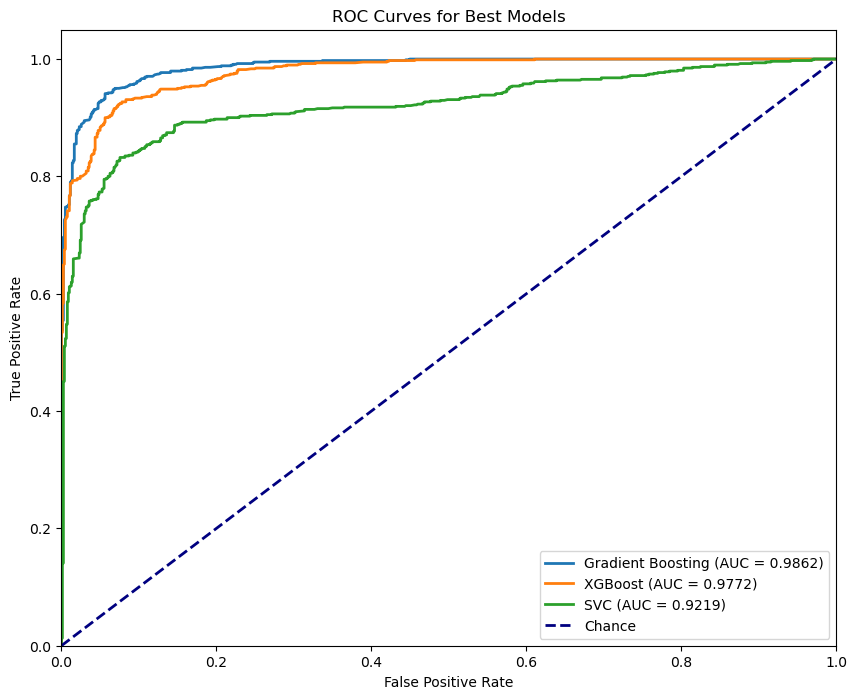

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Dictionary of best models for easy iteration
best_models = {
    "Gradient Boosting": best_gb,
    "XGBoost": best_xgb,
    "SVC": best_svc
}

plt.figure(figsize=(10, 8))

for model_name, model in best_models.items():
    # For models with predict_proba (all in this case because we set probability=True for SVC)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.4f})')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Best Models")
plt.legend(loc="lower right")
plt.show()

## Prediction

In [42]:
X.columns

Index(['age_at_diagnosis', 'ajcc_pathologic_stage',
       'cancer_category_Highly Aggressive & Rare',
       'cancer_category_Invasive Ductal Carcinoma (IDC)',
       'cancer_category_Invasive Lobular Carcinoma (ILC)',
       'cancer_category_Rare Subtypes',
       'cancer_category_Slow-Growing & Favorable Prognosis',
       'diagnosis_method_category_General Biopsy',
       'diagnosis_method_category_Needle Biopsy',
       'diagnosis_method_category_Surgical Diagnosis',
       'treatment_category_Chemotherapy', 'treatment_category_Hormone Therapy',
       'treatment_category_Radiation Therapy',
       'treatment_category_Surgery & Ancillary Procedures',
       'treatment_category_Targeted & Immunotherapy'],
      dtype='object')

### Prediction function

Predict treatment or therapy requirement using the best Gradient Boosting model.
    
Parameters:
    age: float or int, the patient's age at diagnosis.
    stage: float or int, the ajcc_pathologic_stage (e.g., 2 or 3).
    cancer_category: str, suffix for the cancer_category column (e.g., "Invasive Ductal Carcinoma (IDC)").
    diagnosis_method: str, suffix for the diagnosis_method_category column (e.g., "Needle Biopsy").
    treatment_category: str, suffix for the treatment_category column (e.g., "Chemotherapy").
    
Returns:
    The prediction from best_gb model.

In [44]:
def predict_treatment_or_therapy(age, stage, cancer_category, diagnosis_method, treatment_category):
    import numpy as np
    
    # Create a feature vector with zeros of the same length as X.columns
    x = np.zeros(len(X.columns))
    
    # Set the numeric features. We assume:
    # 'age_at_diagnosis' is the first column and 'ajcc_pathologic_stage' is the second column.
    # Alternatively, we use get_loc() to find their indices.
    
    x[X.columns.get_loc('age_at_diagnosis')] = age
    x[X.columns.get_loc('ajcc_pathologic_stage')] = stage
    
    # Construct full column names for categorical features
    cancer_col = "cancer_category_" + cancer_category
    diag_col = "diagnosis_method_category_" + diagnosis_method
    treat_col = "treatment_category_" + treatment_category
    
    # Set the appropriate one-hot encoded feature to 1 if the column exists
    if cancer_col in X.columns:
        x[X.columns.get_loc(cancer_col)] = 1
    else:
        print(f"Warning: {cancer_col} not found in feature columns.")
    
    if diag_col in X.columns:
        x[X.columns.get_loc(diag_col)] = 1
    else:
        print(f"Warning: {diag_col} not found in feature columns.")
    
    if treat_col in X.columns:
        x[X.columns.get_loc(treat_col)] = 1
    else:
        print(f"Warning: {treat_col} not found in feature columns.")
    
    # Use the best Gradient Boosting model (best_gb) to predict treatment_or_therapy
    prediction = best_gb.predict([x])[0]
    return prediction

In [45]:
# Example usage:
# (Assuming that the column names in X include, for instance: 
# "cancer_category_Invasive Ductal Carcinoma (IDC)",
# "diagnosis_method_category_Needle Biopsy", and
# "treatment_category_Chemotherapy")
predicted_treatment = predict_treatment_or_therapy(
    age=55,
    stage=2,
    cancer_category="Invasive Ductal Carcinoma (IDC)",
    diagnosis_method="Needle Biopsy",
    treatment_category="Chemotherapy"
)

print("Predicted treatment/therapy requirement:", predicted_treatment)

Predicted treatment/therapy requirement: 1


## Save Model using Joblib

In [47]:
import joblib
joblib.dump(best_gb, 'best_gb_model.joblib')

['best_gb_model.joblib']

In [48]:
# Later, load your model in your Flask app
# model = joblib.load('best_gb_model.joblib')

## Export column information to a file that will be useful later on in my prediction application

In [50]:
import json

# List of column names
data_columns = [
    'age_at_diagnosis',
    'ajcc_pathologic_stage',
    'cancer_category_Highly Aggressive & Rare',
    'cancer_category_Invasive Ductal Carcinoma (IDC)',
    'cancer_category_Invasive Lobular Carcinoma (ILC)',
    'cancer_category_Rare Subtypes',
    'cancer_category_Slow-Growing & Favorable Prognosis',
    'diagnosis_method_category_General Biopsy',
    'diagnosis_method_category_Needle Biopsy',
    'diagnosis_method_category_Surgical Diagnosis',
    'treatment_category_Chemotherapy',
    'treatment_category_Hormone Therapy',
    'treatment_category_Radiation Therapy',
    'treatment_category_Surgery & Ancillary Procedures',
    'treatment_category_Targeted & Immunotherapy'
]

# Create a dictionary with the columns in lower case
columns = {
    'data_columns': [col.lower() for col in data_columns]
}

# Save the dictionary to a JSON file
with open("columns.json", "w") as f:
    json.dump(columns, f)